In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import calendar

In [2]:
kobe = pd.read_csv('kobe.csv')

In [3]:
kobe.columns

Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp', 'Unnamed: 7', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')

In [4]:
kobe = kobe[kobe['GS'].apply(len) < 3]

In [5]:
kobe.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2015-10-28,37-066,LAL,NaN,MIN,L (-1),1,28:56,...,4,4,1,2,0,0,1,24,13.9,-6
1,2,2.0,2015-10-30,37-068,LAL,@,SAC,L (-18),1,22:12,...,2,4,3,0,0,3,2,13,6.5,-18
2,3,3.0,2015-11-01,37-070,LAL,NaN,DAL,L (-10),1,31:21,...,3,5,1,0,0,1,5,15,5.7,-2
3,4,4.0,2015-11-03,37-072,LAL,NaN,DEN,L (-11),1,29:10,...,1,2,5,2,0,1,5,11,8.0,-4
4,5,5.0,2015-11-06,37-075,LAL,@,BRK,W (+6),1,31:02,...,3,3,3,0,0,3,3,18,7.2,-6


In [6]:
playoff = pd.read_csv('playoffs.csv')
playoff.head()

,Rk,G,1997 Playoffs,Series,Tm,Unnamed: 5,Opp,G#,Unnamed: 8,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,1997-04-25,WC1,LAL,NaN,POR,1,W (+18),0,...,0,0,0,0,0,0,0,2,1.7,2
1,2,2,1997-04-27,WC1,LAL,NaN,POR,2,W (+14),0,...,0,0,0,0,0,0,1,6,3.9,-4
2,3,3,1997-04-30,WC1,LAL,@,POR,3,L (-8),0,...,4,4,2,1,0,4,5,22,12.5,15
3,4,4,1997-05-02,WC1,LAL,@,POR,4,W (+4),0,...,0,0,0,0,0,0,0,0,0.0,-2
4,5,5,1997-05-04,WCS,LAL,@,UTA,1,L (-16),0,...,1,2,3,0,1,0,5,3,-0.1,-10


In [7]:
playoff.columns = ['Rk', 'G', 'Date', 'Series', 'Tm', 'Unnamed: 5', 'Opp', 'G#',
       'Unnamed: 8', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'GmSc', '+/-']

In [8]:
playoff = playoff[playoff['GS'].apply(type) == int]

In [9]:
reduced = ['Date', 'Unnamed: 7', 'MP', 'FG', 'TRB', 'AST', 'STL', 'BLK', 'PTS']
reducedp = ['Date', 'Unnamed: 8', 'MP', 'FG', 'TRB', 'AST', 'STL', 'BLK', 'PTS']
cols = ['Date', 'W/L', 'MP', 'FG', 'TRB', 'AST', 'STL', 'BLK', 'PTS']

In [10]:
kobe = kobe[reduced]
playoff = playoff[reducedp]

In [11]:
kobe.columns = cols
playoff.columns = cols

In [12]:
kobe.head()

,Date,W/L,MP,FG,TRB,AST,STL,BLK,PTS
0,2015-10-28,L (-1),28:56,8,4,1,2,0,24
1,2015-10-30,L (-18),22:12,5,4,3,0,0,13
2,2015-11-01,L (-10),31:21,3,5,1,0,0,15
3,2015-11-03,L (-11),29:10,4,2,5,2,0,11
4,2015-11-06,W (+6),31:02,5,3,3,0,0,18


In [13]:
playoff.head()

,Date,W/L,MP,FG,TRB,AST,STL,BLK,PTS
0,1997-04-25,W (+18),0:46,1,0,0,0,0,2
1,1997-04-27,W (+14),4:50,1,0,0,0,0,6
2,1997-04-30,L (-8),26:51,7,4,2,1,0,22
3,1997-05-02,W (+4),5:34,0,0,0,0,0,0
4,1997-05-04,L (-16),14:28,1,2,3,0,1,3


In [14]:
kobe_entire = pd.concat([kobe, playoff])
kobe_entire.head()

,Date,W/L,MP,FG,TRB,AST,STL,BLK,PTS
0,2015-10-28,L (-1),28:56,8,4,1,2,0,24
1,2015-10-30,L (-18),22:12,5,4,3,0,0,13
2,2015-11-01,L (-10),31:21,3,5,1,0,0,15
3,2015-11-03,L (-11),29:10,4,2,5,2,0,11
4,2015-11-06,W (+6),31:02,5,3,3,0,0,18


In [15]:
def win_loss(i):
    if 'L' in i:
        return 0
    else:
        return 1

In [16]:
kobe_entire['W/L'] = kobe_entire['W/L'].apply(win_loss)
kobe_entire.head()

,Date,W/L,MP,FG,TRB,AST,STL,BLK,PTS
0,2015-10-28,0,28:56,8,4,1,2,0,24
1,2015-10-30,0,22:12,5,4,3,0,0,13
2,2015-11-01,0,31:21,3,5,1,0,0,15
3,2015-11-03,0,29:10,4,2,5,2,0,11
4,2015-11-06,1,31:02,5,3,3,0,0,18


In [17]:
kobe_entire['Datetime'] = pd.to_datetime(kobe_entire['Date'], infer_datetime_format=True)
kobe_entire = kobe_entire.reset_index()
kobe_entire.head()

,index,Date,W/L,MP,FG,TRB,AST,STL,BLK,PTS,Datetime
0,0,2015-10-28,0,28:56,8,4,1,2,0,24,2015-10-28
1,1,2015-10-30,0,22:12,5,4,3,0,0,13,2015-10-30
2,2,2015-11-01,0,31:21,3,5,1,0,0,15,2015-11-01
3,3,2015-11-03,0,29:10,4,2,5,2,0,11,2015-11-03
4,4,2015-11-06,1,31:02,5,3,3,0,0,18,2015-11-06


In [18]:
def findDay(date): 
    born = date.weekday() 
    return (calendar.day_name[born]) 

In [19]:
kobe_entire['Day'] = [findDay(i) for i in kobe_entire['Datetime']]
kobe_entire.head()

,index,Date,W/L,MP,FG,TRB,AST,STL,BLK,PTS,Datetime,Day
0,0,2015-10-28,0,28:56,8,4,1,2,0,24,2015-10-28,Wednesday
1,1,2015-10-30,0,22:12,5,4,3,0,0,13,2015-10-30,Friday
2,2,2015-11-01,0,31:21,3,5,1,0,0,15,2015-11-01,Sunday
3,3,2015-11-03,0,29:10,4,2,5,2,0,11,2015-11-03,Tuesday
4,4,2015-11-06,1,31:02,5,3,3,0,0,18,2015-11-06,Friday


In [47]:
by_day = kobe_entire[['W/L', 'MP', 'FG', 'TRB', 'AST', 'STL', 'BLK', 'PTS', 'Day']]
by_day.head()

,W/L,MP,FG,TRB,AST,STL,BLK,PTS,Day
0,0,28:56,8,4,1,2,0,24,Wednesday
1,0,22:12,5,4,3,0,0,13,Friday
2,0,31:21,3,5,1,0,0,15,Sunday
3,0,29:10,4,2,5,2,0,11,Tuesday
4,1,31:02,5,3,3,0,0,18,Friday


In [21]:
def minute(i):
    return float(i.replace(':', '.'))

In [48]:
by_day['MP'] = by_day['MP'].apply(minute)
for i in ['FG', 'TRB', 'AST', 'STL', 'BLK', 'PTS']:
    by_day[i] = by_day[i].apply(int)
    
by_day.head()

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,W/L,MP,FG,TRB,AST,STL,BLK,PTS,Day
0,0,28.56,8,4,1,2,0,24,Wednesday
1,0,22.12,5,4,3,0,0,13,Friday
2,0,31.21,3,5,1,0,0,15,Sunday
3,0,29.10,4,2,5,2,0,11,Tuesday
4,1,31.02,5,3,3,0,0,18,Friday


In [51]:
analysis = by_day.groupby('Day').mean()
analysis

,W/L,MP,FG,TRB,AST,STL,BLK,PTS
Day,,,,,,,,
Friday,0.641104,36.105184,8.684049,5.122699,4.865031,1.463190,0.509202,25.217791
Monday,0.556522,36.280087,8.565217,4.782609,4.165217,1.478261,0.521739,24.339130
Saturday,0.585106,38.017979,8.851064,5.372340,4.787234,1.382979,0.521277,24.872340
Sunday,0.626062,36.218130,8.699717,5.320113,4.784703,1.424929,0.492918,24.776204
Thursday,0.576642,37.910365,9.445255,5.605839,4.715328,1.313869,0.467153,26.744526
Tuesday,0.673759,35.884113,8.666667,5.170213,4.592199,1.531915,0.496454,24.985816
Wednesday,0.590734,36.154749,8.787645,5.162162,4.637066,1.397683,0.505792,24.976834


In [56]:
analysis['weekday'] = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']
analysis['sort'] = [6, 2, 7, 1, 5, 3, 4]
analysis = analysis.sort_values('sort')

In [57]:
analysis

,W/L,MP,FG,TRB,AST,STL,BLK,PTS,weekday,sort
Day,,,,,,,,,,
Sunday,0.626062,36.218130,8.699717,5.320113,4.784703,1.424929,0.492918,24.776204,Sun,1
Monday,0.556522,36.280087,8.565217,4.782609,4.165217,1.478261,0.521739,24.339130,Mon,2
Tuesday,0.673759,35.884113,8.666667,5.170213,4.592199,1.531915,0.496454,24.985816,Tue,3
Wednesday,0.590734,36.154749,8.787645,5.162162,4.637066,1.397683,0.505792,24.976834,Wed,4
Thursday,0.576642,37.910365,9.445255,5.605839,4.715328,1.313869,0.467153,26.744526,Thu,5
Friday,0.641104,36.105184,8.684049,5.122699,4.865031,1.463190,0.509202,25.217791,Fri,6
Saturday,0.585106,38.017979,8.851064,5.372340,4.787234,1.382979,0.521277,24.872340,Sat,7


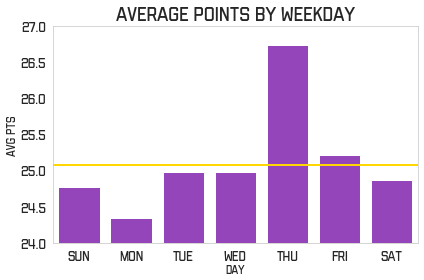

In [58]:
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.barplot(x='weekday', y='PTS', data=analysis, color='darkorchid')
#plt.setp(ax.get_legend().get_texts(), fontproperties=prop) # for legend text
#plt.setp(ax.get_legend().get_title(), fontproperties=prop)
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=14);
plt.yticks(fontproperties=prop, size=14);
plt.xlabel('Day', fontproperties=prop, size=12);
plt.ylabel('Avg Pts', fontproperties=prop, size=12);
plt.ylim([24, 27])
plt.axhline(y=np.mean(by_day['PTS']),linewidth=2, color='gold');
#print('kawhi', np.mean(relevant['BLK']))
#plt.axhline(y=np.mean(wallace['BLK']),linewidth=2, color=sns.color_palette("Set2")[1]);
#print('wallace', np.mean(wallace['BLK']))
ax.set_title('Average Points by Weekday', fontproperties=prop, size=20);

plt.tight_layout()
plt.savefig("kobpoints.png")

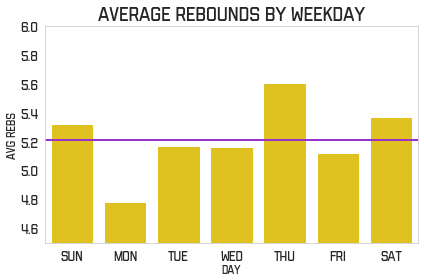

In [59]:
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.barplot(x='weekday', y='TRB', data=analysis, color='gold')
#plt.setp(ax.get_legend().get_texts(), fontproperties=prop) # for legend text
#plt.setp(ax.get_legend().get_title(), fontproperties=prop)
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=14);
plt.yticks(fontproperties=prop, size=14);
plt.xlabel('Day', fontproperties=prop, size=12);
plt.ylabel('Avg Rebs', fontproperties=prop, size=12);
plt.ylim([4.5, 6])
plt.axhline(y=np.mean(by_day['TRB']),linewidth=2, color='darkorchid');
#print('kawhi', np.mean(relevant['BLK']))
#plt.axhline(y=np.mean(wallace['BLK']),linewidth=2, color=sns.color_palette("Set2")[1]);
#print('wallace', np.mean(wallace['BLK']))
ax.set_title('Average Rebounds by Weekday', fontproperties=prop, size=20);

plt.tight_layout()
plt.savefig("kobrebs.png")

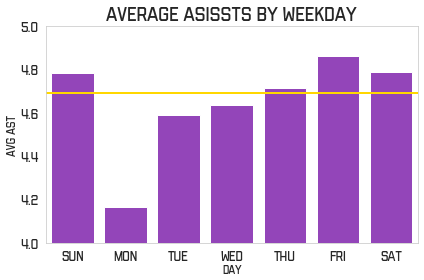

In [60]:
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.barplot(x='weekday', y='AST', data=analysis, color='darkorchid')
#plt.setp(ax.get_legend().get_texts(), fontproperties=prop) # for legend text
#plt.setp(ax.get_legend().get_title(), fontproperties=prop)
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=14);
plt.yticks(fontproperties=prop, size=14);
plt.xlabel('Day', fontproperties=prop, size=12);
plt.ylabel('Avg Ast', fontproperties=prop, size=12);
plt.ylim([4, 5])
plt.axhline(y=np.mean(by_day['AST']),linewidth=2, color='gold');
#print('kawhi', np.mean(relevant['BLK']))
#plt.axhline(y=np.mean(wallace['BLK']),linewidth=2, color=sns.color_palette("Set2")[1]);
#print('wallace', np.mean(wallace['BLK']))
ax.set_title('Average Asissts by Weekday', fontproperties=prop, size=20);

plt.tight_layout()
plt.savefig("kobast.png")

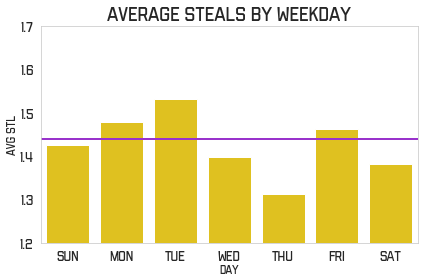

In [62]:
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.barplot(x='weekday', y='STL', data=analysis, color='gold')
#plt.setp(ax.get_legend().get_texts(), fontproperties=prop) # for legend text
#plt.setp(ax.get_legend().get_title(), fontproperties=prop)
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=14);
plt.yticks(fontproperties=prop, size=14);
plt.xlabel('Day', fontproperties=prop, size=12);
plt.ylabel('Avg STL', fontproperties=prop, size=12);
plt.ylim([1.2, 1.7])
plt.axhline(y=np.mean(by_day['STL']),linewidth=2, color='darkorchid');
#print('kawhi', np.mean(relevant['BLK']))
#plt.axhline(y=np.mean(wallace['BLK']),linewidth=2, color=sns.color_palette("Set2")[1]);
#print('wallace', np.mean(wallace['BLK']))
ax.set_title('Average Steals by Weekday', fontproperties=prop, size=20);

plt.tight_layout()
plt.savefig("kobslt.png")

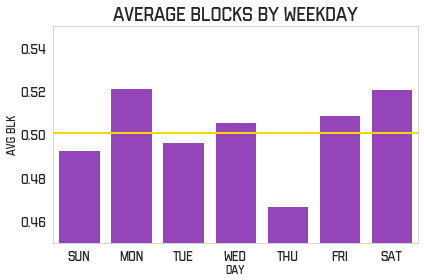

In [67]:
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.barplot(x='weekday', y='BLK', data=analysis, color='darkorchid')
#plt.setp(ax.get_legend().get_texts(), fontproperties=prop) # for legend text
#plt.setp(ax.get_legend().get_title(), fontproperties=prop)
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=14);
plt.yticks(fontproperties=prop, size=14);
plt.xlabel('Day', fontproperties=prop, size=12);
plt.ylabel('Avg Blk', fontproperties=prop, size=12);
plt.ylim([0.45, 0.55])
plt.axhline(y=np.mean(by_day['BLK']),linewidth=2, color='gold');
#print('kawhi', np.mean(relevant['BLK']))
#plt.axhline(y=np.mean(wallace['BLK']),linewidth=2, color=sns.color_palette("Set2")[1]);
#print('wallace', np.mean(wallace['BLK']))
ax.set_title('Average Blocks by Weekday', fontproperties=prop, size=20);

plt.tight_layout()
plt.savefig("kobblk.png")

In [73]:
np.mean(by_day['BLK'])

0.5006385696040868